# Tutorial 6e - Color Evolution of a Thin-Film

This example shows how the reflected color of a TiO2 thin film on silica evolves with thickness. We compute chromaticity coordinates from a normalized reflected spectrum and visualize the path on the CIE 1931 diagram, then summarize the color evolution with a thickness color bar.

**Goals**
- Compute $x, y$ chromaticity for a TiO2 layer on SiO2.
- Trace the chromaticity path for thicknesses from 0 to 250 nm.
- Visualize the perceived color as a function of thickness.

In [19]:
import matplotlib.pyplot as plt

import optiland.backend as be
from optiland.materials import IdealMaterial, Material
from optiland.thin_film import SpectralAnalyzer, ThinFilmStack
from optiland.colorimetry.plotting import plot_cie_1931_chromaticity_diagram

## 1) Define the stack and wavelength grid

We use air as the incident medium, a TiO2 layer with variable thickness, and a silica (SiO2) substrate. The spectrum is sampled from 380 to 780 nm with a 5 nm step.

In [20]:
air = IdealMaterial(n=1.0)
sio2 = Material("SiO2", reference="Gao")
tio2 = Material("TiO2", reference="Zhukovsky")

stack = ThinFilmStack(incident_material=air, substrate_material=sio2)
stack.add_layer_nm(tio2, 0.0, name="TiO2")

analyzer = SpectralAnalyzer(stack)

max_thickness_nm = 250.0
wavelengths_nm = be.linspace(380.0, 780.0, 81)
thicknesses_nm = be.linspace(0.0, max_thickness_nm, 251)

## 2) Compute chromaticity for each thickness

We compute the reflected spectrum for each thickness, then extract CIE $x,y$ and an sRGB triplet for visualization. The spectrum is a normalized power quantity (R), which is sufficient for chromaticity.

In [21]:
x_path = []
y_path = []
colors = []

for thickness_nm in thicknesses_nm:
    stack.layers[0].thickness_um = float(thickness_nm) / 1000.0

    result = analyzer.analyze_color(
        wavelength_values=wavelengths_nm,
        wavelength_unit="nm",
        aoi=0.0,
        aoi_unit="deg",
        polarization="u",
        quantity="R",
        observer="2deg",
    )

    x, y, _ = result["xyY"]
    r, g, b = result["sRGB"]

    x_path.append(x)
    y_path.append(y)
    colors.append([r / 255.0, g / 255.0, b / 255.0])

## 3) Plot the chromaticity path on the CIE 1931 diagram

We plot the path and mark the start (0 nm) and end (250 nm) points.

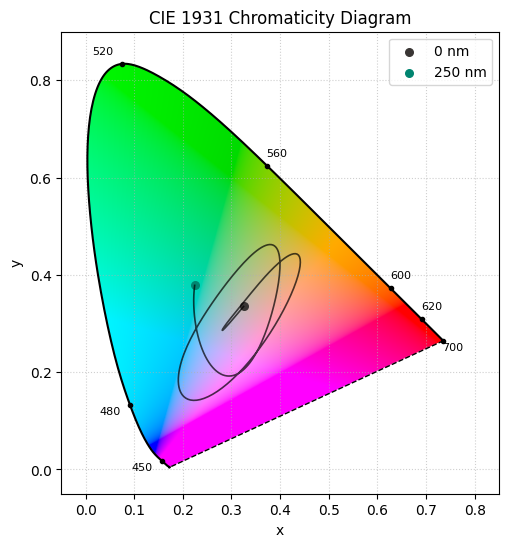

In [22]:
fig, ax = plot_cie_1931_chromaticity_diagram(color="fill")

ax.plot(x_path, y_path, color="black", linewidth=1.2, alpha=0.7)
ax.scatter(x_path[0], y_path[0], s=30, color=colors[0], label="0 nm")
ax.scatter(x_path[-1], y_path[-1], s=30, color=colors[-1], label="250 nm")
ax.legend()

plt.show()

## 4) Color bar versus thickness

This compact color bar summarizes the perceived reflected color as a function of TiO_2 thickness. We obtain the Michel-Levy chart.

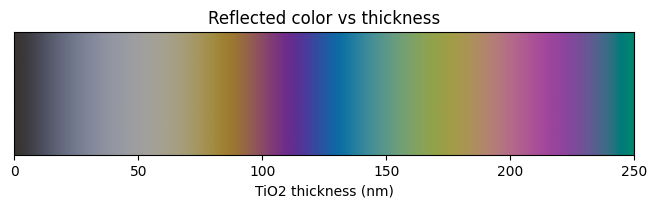

In [23]:
colors_array = be.asarray(colors)
colors_image = colors_array[None, :, :]

fig, ax = plt.subplots(figsize=(8, 1.6))
ax.imshow(
    colors_image,
    aspect="auto",
    extent=[float(thicknesses_nm[0]), float(thicknesses_nm[-1]), 0, 1],
)
ax.set_yticks([])
ax.set_xlabel("TiO2 thickness (nm)")
ax.set_title("Reflected color vs thickness")

plt.show()